<a href="https://colab.research.google.com/github/vini1lol/Harvardx/blob/master/CaseStudy5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
birddata = pd.read_csv("/content/drive/My Drive/havardx/Using Python for Research/week4/bird_tracking.csv")
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [0]:
birddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          61920 non-null  int64  
 1   altitude            61920 non-null  int64  
 2   date_time           61920 non-null  object 
 3   device_info_serial  61920 non-null  int64  
 4   direction           61477 non-null  float64
 5   latitude            61920 non-null  float64
 6   longitude           61920 non-null  float64
 7   speed_2d            61477 non-null  float64
 8   bird_name           61920 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 4.3+ MB


In [0]:
import matplotlib.pyplot as plt
import numpy as np


In [0]:
ix = birddata.bird_name == 'Eric'

In [0]:
x,y = birddata.latitude[ix], birddata.longitude[ix]

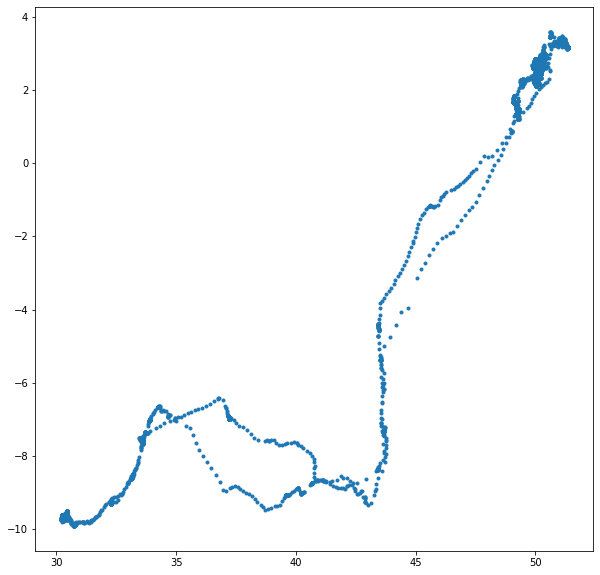

In [0]:
plt.figure(figsize=(10,10))
plt.plot(x,y,".")

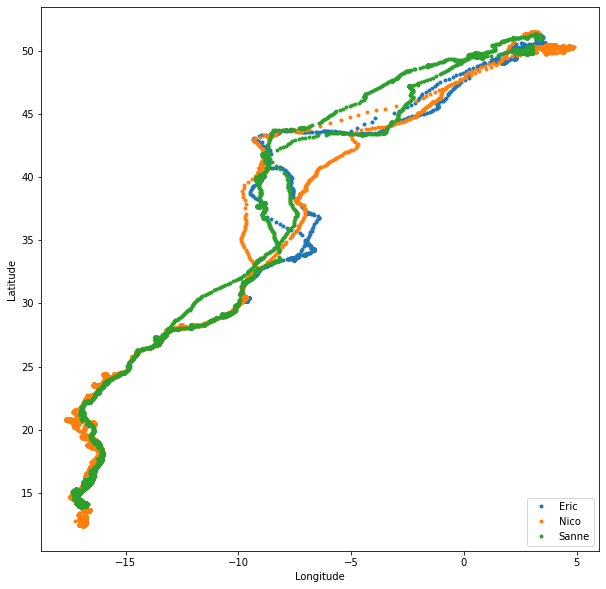

In [0]:
bird_names = pd.unique(birddata.bird_name)
plt.figure(figsize=(10,10))
for bird_name in bird_names:
  ix = birddata.bird_name == bird_name
  x,y = birddata.longitude[ix], birddata.latitude[ix]
  plt.plot(x,y,".",label=bird_name)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right")

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.7732e+04, 1.5020e+03, 3.6900e+02, 7.8000e+01, 1.2000e+01,
        7.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0.        ,  6.34880658, 12.69761316, 19.04641974, 25.39522632,
        31.7440329 , 38.09283948, 44.44164607, 50.79045265, 57.13925923,
        63.48806581]),
 <a list of 10 Patch objects>)

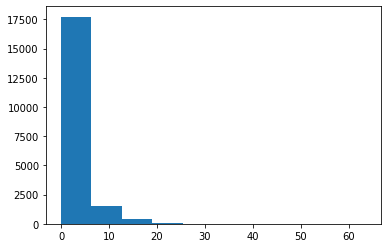

In [0]:
ix = birddata.bird_name == "Eric"
speed = birddata.speed_2d[ix]
plt.hist(speed)

In [0]:
np.isnan(speed).any()

True

In [0]:
np.sum(np.isnan(speed))

85

In [0]:
ind = np.isnan(speed)

Text(0, 0.5, 'Frequency')

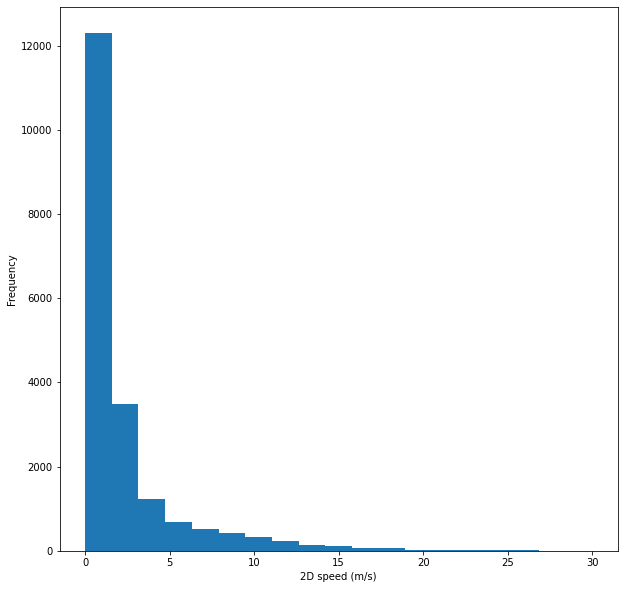

In [0]:
ix = birddata.bird_name == "Eric"
speed = birddata.speed_2d[ix]
ind = np.isnan(speed)
plt.figure(figsize=(10,10))
plt.hist(speed[~ind], bins=np.linspace(0,30,20))
plt.xlabel("2D speed (m/s)")
plt.ylabel("Frequency")

Text(0.5, 0, '2D speed')

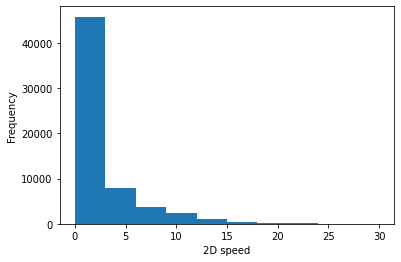

In [0]:
birddata.speed_2d.plot(kind="hist", range=[0,30])
plt.xlabel("2D speed")

In [0]:
import datetime
datetime.datetime.today()

datetime.datetime(2020, 5, 6, 11, 25, 54, 612152)

In [0]:
date_str=birddata.date_time[0]
datetime.datetime.strptime(date_str[:-3],"%Y-%m-%d %H:%M:%S")

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [0]:
timestamps = []
for k in range(len(birddata)):
  timestamps.append(datetime.datetime.strptime(birddata.date_time.iloc[k][:-3],"%Y-%m-%d %H:%M:%S"))
timestamps[:5]

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58),
 datetime.datetime(2013, 8, 15, 1, 47, 51),
 datetime.datetime(2013, 8, 15, 2, 17, 42)]

In [0]:
birddata["timestamps"] = pd.Series(timestamps,index=birddata.index) 

In [0]:
times = birddata.timestamps[birddata.bird_name == "Eric"]
elapsed_time = [time-times[0] for time in times]
elapsed_time[100]

Timedelta('1 days 05:24:41')

In [0]:
elapsed_time[100]/ datetime.timedelta(days=1)

1.225474537037037

In [0]:
elapsed_time[100]/ datetime.timedelta(hours =1)

29.41138888888889

Text(0, 0.5, 'Elapsed time (days)')

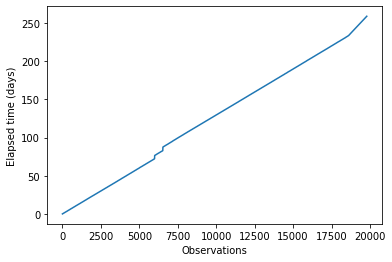

In [0]:
plt.plot(np.array(elapsed_time) / datetime.timedelta(days=1))
plt.xlabel("Observations")
plt.ylabel("Elapsed time (days)")

In [0]:
birddata.timestamps[birddata.bird_name=="Sanne"]

40916   2013-08-15 00:01:08
40917   2013-08-15 00:31:00
40918   2013-08-15 01:01:19
40919   2013-08-15 01:31:38
40920   2013-08-15 02:01:24
                ...        
61915   2014-04-30 22:00:08
61916   2014-04-30 22:29:57
61917   2014-04-30 22:59:52
61918   2014-04-30 23:29:43
61919   2014-04-30 23:59:34
Name: timestamps, Length: 21004, dtype: datetime64[ns]